(60000, 28, 28)
输出的种类数： 10
第一个隐藏层参数: (784, 300) (300,)
Epoch 1/10
1719/1719 [==============================] - 2s 924us/step - loss: 0.7228 - accuracy: 0.7631 - val_loss: 0.5282 - val_accuracy: 0.8168
Epoch 2/10
1719/1719 [==============================] - 1s 868us/step - loss: 0.4894 - accuracy: 0.8293 - val_loss: 0.4845 - val_accuracy: 0.8298
Epoch 3/10
1719/1719 [==============================] - 2s 978us/step - loss: 0.4456 - accuracy: 0.8440 - val_loss: 0.4131 - val_accuracy: 0.8604
Epoch 4/10
1719/1719 [==============================] - 1s 855us/step - loss: 0.4162 - accuracy: 0.8534 - val_loss: 0.4094 - val_accuracy: 0.8612
Epoch 5/10
1719/1719 [==============================] - 1s 795us/step - loss: 0.3962 - accuracy: 0.8607 - val_loss: 0.3984 - val_accuracy: 0.8650
Epoch 6/10
1719/1719 [==============================] - 1s 848us/step - loss: 0.3804 - accuracy: 0.8659 - val_loss: 0.3820 - val_accuracy: 0.8648
Epoch 7/10
1719/1719 [==============================] - 2s 922us/step

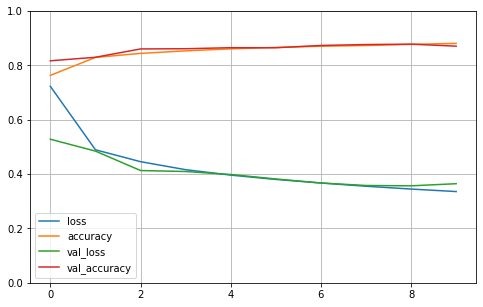

313/313 [==============================] - 0s 827us/step - loss: 70.2014 - accuracy: 0.8318
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
9
分类独热概率： [9 2 1]
分类结果： [9 2 1]
实际结果： [9 2 1]


In [1]:
#神经网络实现分类
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '/gpu:0'
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
x_train,x_valid = x_train[5000:]/255.0,x_train[:5000]/255.0
y_train,y_valid = y_train[5000:],y_train[:5000]
print('输出的种类数：',len(np.unique(y_valid)))

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
# model.summary()    #显示模型的所有层
# model.layers.name
hidden1 = model.layers[1]
weights,biases = hidden1.get_weights()
print('第一个隐藏层参数:',weights.shape,biases.shape)
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))   #validation_split =0.1
print(y_train.shape)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

model.evaluate(x_test,y_test)
x_new = x_test[:3]
y_proba = model.predict_classes(x_new)
print(y_proba[0])
print('分类独热概率：',y_proba.round(2))

y_pred = model.predict_classes(x_new)
print('分类结果：',y_pred)
print('实际结果：',y_test[:3])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================]11610/11610 [==============================] - 5s 417us/step - loss: 0.8362 - val_loss: 0.8087

Epoch 2/20
11610/11610 [==============================]11610/11610 [==============================] - 1s 129us/step - loss: 0.7850 - val_loss: 0.5273

Epoch 3/20
11610/11610 [==============================]11610/11610 [==============================] - 1s 103us/step - loss: 0.4970 - val_loss: 0.4667

Epoch 4/20
11610/11610 [==============================]11610/11610 [==============================] - 2s 140us/step - loss: 0.4586 - val_loss: 0.4421

Epoch 5/20
11610/11610 [==============================]11610/11610 [==============================] - 2s 135us/step - loss: 0.4397 - val_loss: 0.4481

Epoch 6/20
11610/11610 [==============================]11610/11610 [==============================] - 2s 154us/step - loss:

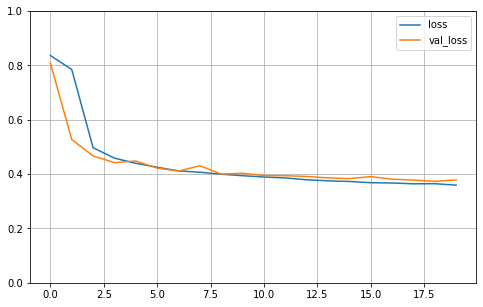

In [1]:
#顺序API构建MLP实现回归

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

housing = fetch_california_housing()
x_train,x_test,y_train,y_test = train_test_split(housing.data,housing.target)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error',optimizer='sgd')#回归不用metrics=['accuracy']
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))
mse_test = model.evaluate(x_test,y_test)
x_new = x_test[:3]
y_pred = model.predict(x_new)

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0014 - main_output_loss: 0.8638 - aux_output_loss: 2.2403 - val_loss: 0.6372 - val_main_output_loss: 0.5697 - val_aux_output_loss: 1.2445
Epoch 2/20
363/363 [==============================] - 0s 958us/step - loss: 0.6554 - main_output_loss: 0.5977 - aux_output_loss: 1.1750 - val_loss: 0.5364 - val_main_output_loss: 0.4859 - val_aux_output_loss: 0.9908
Epoch 3/20
363/363 [==============================] - 0s 961us/step - loss: 0.5146 - main_output_loss: 0.4675 - aux_output_loss: 0.9387 - val_loss: 0.4920 - val_main_output_loss: 0.4546 - val_aux_output_loss: 0.8294
Epoch 4/20
363/363 [==============================] - 0s 950us/step - loss: 0.4790 - main_output_loss: 0.4435 - aux_output_loss: 0.7990 - val_loss: 0.4681 - val_main_output_loss: 0.4392 - val_aux_output_loss: 0.7280
Epoch 5/20
363/363 [==============================] - 0s 964us/step - loss: 0.4575 - main_output_loss: 0.4287 - aux_output_loss: 0.7170 - 

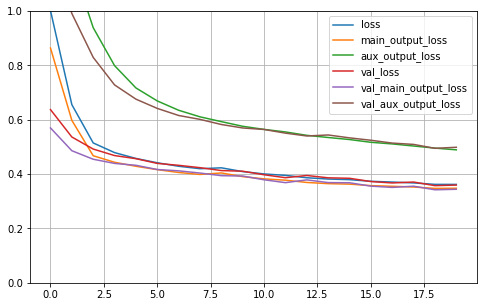

In [1]:
#使用函数时API构建复杂模型  多个输入及多个输出 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

housing = fetch_california_housing()
x_train,x_test,y_train,y_test = train_test_split(housing.data,housing.target)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)
x_train_a,x_train_b = x_train[:,:5],x_train[:,2:]
x_test_a,x_test_b = x_test[:,:5],x_test[:,2:]
x_valid_a,x_valid_b = x_valid[:,:5],x_valid[:,2:]
x_new_a,x_new_b = x_test[:3,:5],x_test[:3,2:]
input_a = keras.layers.Input(shape=[5],name='wide_input')
input_b = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_b)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_a,hidden2])
output = keras.layers.Dense(1,name='main_output')(concat)
aux_output = keras.layers.Dense(1,name='aux_output')(hidden2)
model = keras.Model(inputs=[input_a,input_b],outputs=[output,aux_output])

model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer='sgd')
history = model.fit([x_train_a,x_train_b],[y_train,y_train],epochs=20,validation_data=([x_valid_a,x_valid_b],[y_valid,y_valid]))
total_loss,main_loss,aux_loss = model.evaluate([x_test_a,x_test_b],[y_test,y_test])
y_pred_main,y_pred_aux = model.predict([x_new_a,x_new_b])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# 保存和下载模型
# model.save('my_keras_model.h5')
# model =keras.models.load_model('my_keras_model.h5')

In [2]:
#微调神经网络参数 
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train,x_test,y_train,y_test = train_test_split(housing.data,housing.target)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)
x_new = x_test[:3,:]
def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse',optimizer=optimizer)
    return model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(x_train,y_train,epochs=100,validation_data=(x_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(x_test,y_test) 
y_pred = keras_reg.predict(x_new)
print('score:',mse_test,'y_pred:',y_pred)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================]11610/11610 [==============================] - 2s 160us/step - loss: 1.6737 - val_loss: 0.6732

Epoch 2/100
11610/11610 [==============================]11610/11610 [==============================] - 2s 130us/step - loss: 0.6167 - val_loss: 0.5770

Epoch 3/100
11610/11610 [==============================]11610/11610 [==============================] - 1s 125us/step - loss: 0.5438 - val_loss: 0.5421

Epoch 4/100
11610/11610 [==============================]11610/11610 [==============================] - 2s 141us/step - loss: 0.5137 - val_loss: 0.5201

Epoch 5/100
11610/11610 [==============================]11610/11610 [==============================] - 1s 126us/step - loss: 0.4937 - val_loss: 0.5041

Epoch 6/100
11610/11610 [==============================]11610/11610 [==============================] - 2s 141us/step - loss: 0.4791 - val_loss: 0.4950

Epoch 7/100
11610/11610 [==============

In [6]:
#随机搜索选择最优参数 
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    'n_hidden':[0,1,2,3],
    'n_neurons':np.arange(1,100),
    'learning_rate':reciprocal(3e-4,3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg,param_distribs,n_iter=10,cv=3)
rnd_search_cv.fit(x_train,y_train,epochs=5,validation_data=(x_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
print('best_param:',rnd_search_cv.best_params_,'best_score:',rnd_search_cv.best_score_)

model = rnd_search_cv.best_estimator_.model

Epoch 1/5
242/242 [==============================] - 0s 1ms/step - loss: 3.3728 - val_loss: 2.2801
Epoch 2/5
242/242 [==============================] - 0s 988us/step - loss: 1.7880 - val_loss: 1.3164
Epoch 3/5
242/242 [==============================] - 0s 1ms/step - loss: 1.1764 - val_loss: 0.9873
Epoch 4/5
242/242 [==============================] - 0s 969us/step - loss: 0.9428 - val_loss: 0.8639
Epoch 5/5
121/121 [==============================] - 0s 632us/step - loss: 0.8134
Epoch 1/5
242/242 [==============================] - 0s 1ms/step - loss: 4.4864 - val_loss: 2.8045
Epoch 2/5
242/242 [==============================] - 0s 803us/step - loss: 2.1047 - val_loss: 1.5118
Epoch 3/5
242/242 [==============================] - 0s 898us/step - loss: 1.3046 - val_loss: 1.0869
Epoch 4/5
242/242 [==============================] - 0s 1ms/step - loss: 1.0182 - val_loss: 0.9336
Epoch 5/5
121/121 [==============================] - 0s 618us/step - loss: 0.8433
Epoch 1/5
242/242 [=================

Epoch 3/5
242/242 [==============================] - 0s 901us/step - loss: 0.7291 - val_loss: 0.6980
Epoch 4/5
242/242 [==============================] - 0s 907us/step - loss: 0.6491 - val_loss: 0.6563
Epoch 5/5
121/121 [==============================] - 0s 561us/step - loss: 0.6182
Epoch 1/5
242/242 [==============================] - 0s 1ms/step - loss: 1.3416 - val_loss: 0.7417
Epoch 2/5
242/242 [==============================] - 0s 986us/step - loss: 0.6366 - val_loss: 0.6351
Epoch 3/5
242/242 [==============================] - 0s 918us/step - loss: 0.5828 - val_loss: 0.5944
Epoch 4/5
242/242 [==============================] - 0s 986us/step - loss: 0.5442 - val_loss: 0.5646
Epoch 5/5
121/121 [==============================] - 0s 578us/step - loss: 0.5141
Epoch 1/5
242/242 [==============================] - 0s 1ms/step - loss: 1.3257 - val_loss: 0.8084
Epoch 2/5
242/242 [==============================] - 0s 996us/step - loss: 0.7637 - val_loss: 0.7024
Epoch 3/5
242/242 [=============

121/121 [==============================] - 0s 556us/step - loss: 0.5929
Epoch 1/5
242/242 [==============================] - 0s 1ms/step - loss: 0.7547 - val_loss: 0.6523
Epoch 2/5
242/242 [==============================] - 0s 974us/step - loss: 0.6907 - val_loss: 0.6016
Epoch 3/5
242/242 [==============================] - 0s 903us/step - loss: 0.5139 - val_loss: 0.4991
Epoch 4/5
242/242 [==============================] - 0s 899us/step - loss: 0.4477 - val_loss: 0.4719
Epoch 5/5
121/121 [==============================] - 0s 587us/step - loss: 0.4340
Epoch 1/5
242/242 [==============================] - 0s 1ms/step - loss: 1.0195 - val_loss: 2.5635
Epoch 2/5
242/242 [==============================] - 0s 910us/step - loss: nan - val_loss: nan
Epoch 3/5
242/242 [==============================] - 0s 901us/step - loss: nan - val_loss: nan
Epoch 4/5
242/242 [==============================] - 0s 899us/step - loss: nan - val_loss: nan
Epoch 5/5
121/121 [==============================] - 0s 567u

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000013CD37BC588>, as the constructor either does not set or modifies parameter learning_rate

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7120397343292944467, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 206559643
 locality {
   bus_id: 1
 }
 incarnation: 13963340193607008287
 physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

In [18]:
#电影评论二分类问题 --one-hot编码
import numpy as np
def vectorize_sequences(sequences,dimension=5):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.0
    return results
a = np.array([[1,4,4,0,0],[0,0,0,4,4],[4,3,0,0,1]])   #每个数字对应一个字典里的单词，数字种类的个数决定返回数组中列表的个数
# print(a)
print(vectorize_sequences(a,5))


[[1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 0. 1. 1.]]


8982 2246
Epoch 1/9
15/15 [==============================] - 0s 22ms/step - loss: 2.7773 - accuracy: 0.4323 - val_loss: 1.9226 - val_accuracy: 0.5932
Epoch 2/9
15/15 [==============================] - 0s 13ms/step - loss: 1.5778 - accuracy: 0.6703 - val_loss: 1.4421 - val_accuracy: 0.6784
Epoch 3/9
15/15 [==============================] - 0s 12ms/step - loss: 1.1631 - accuracy: 0.7516 - val_loss: 1.2258 - val_accuracy: 0.7245
Epoch 4/9
15/15 [==============================] - 0s 14ms/step - loss: 0.9169 - accuracy: 0.8078 - val_loss: 1.1296 - val_accuracy: 0.7373
Epoch 5/9
15/15 [==============================] - 0s 13ms/step - loss: 0.7441 - accuracy: 0.8440 - val_loss: 1.0986 - val_accuracy: 0.7429
Epoch 6/9
15/15 [==============================] - 0s 12ms/step - loss: 0.6110 - accuracy: 0.8747 - val_loss: 1.0462 - val_accuracy: 0.7674
Epoch 7/9
15/15 [==============================] - 0s 12ms/step - loss: 0.5022 - accuracy: 0.8987 - val_loss: 0.9929 - val_accuracy: 0.7785
Epoch 8/9


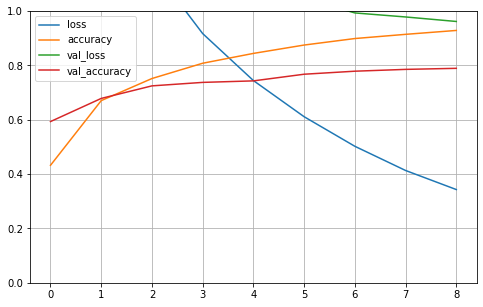

In [35]:
#路透社数据集
from keras.datasets import reuters
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
(train_data,train_label),(test_data,test_label) = reuters.load_data(num_words=10000)
print(len(train_label),len(test_label))
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for key,value in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
# print(decoded_newswire)
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.0
    return results
x_train = vectorize_sequences(train_data)
y_train = vectorize_sequences(test_data)

def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_label)
one_hot_test_labels = to_one_hot(test_label)

model = keras.models.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(10000,)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(46,activation='softmax')
])
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,one_hot_train_labels,epochs=9,batch_size=512,validation_split=0.2)

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()